# La Estacionalidad ($\mathbf{S_t}$) en Series de Tiempo 🗓️

---

## **# 1. ¿Qué es la Estacionalidad?**

La **Estacionalidad** ($\mathbf{S_t}$) es un componente de una serie de tiempo que representa patrones de movimiento que se repiten a **intervalos de tiempo fijos y predecibles**. A diferencia de la Tendencia, que es a largo plazo, la Estacionalidad es un fenómeno de corto plazo y cíclico.

* **Patrón Fijo:** La clave es que el patrón se repite exactamente cada $s$ periodos, donde $s$ es la longitud del ciclo.
* **Causa Conocida:** Suele estar causada por factores naturales (estaciones climáticas), sociales (vacaciones), o institucionales (calendarios fiscales/académicos).

### **Ejemplos Comunes y sus Períodos:**

| Frecuencia de los Datos | Período ($s$) | Ejemplo |
| :--- | :--- | :--- |
| Datos Diarios | $s=7$ | Más tráfico web los lunes que los domingos. |
| Datos Mensuales | $s=12$ | Picos de venta de juguetes en diciembre. |
| Datos Trimestrales | $s=4$ | Ingresos de una empresa con un año fiscal dividido en trimestres. |
| Datos Cada 15 minutos | $s=96$ (4 x 24) | Picos de uso de electricidad a media mañana y por la noche. |

---

## **# 2. Modelos de Estacionalidad: Aditivo vs. Multiplicativo**

El modo en que la Estacionalidad se relaciona con el resto de la serie de tiempo define el modelo de descomposición:

### **Modelo Aditivo**

La magnitud de las fluctuaciones estacionales **NO** cambia al mismo tiempo que el nivel de la serie. Las variaciones estacionales son constantes a lo largo del tiempo.

$$
Y_t = T_t + S_t + R_t
$$

### **Modelo Multiplicativo**

La magnitud de las fluctuaciones estacionales **SÍ** cambia proporcionalmente al nivel de la serie. A medida que la tendencia ($T_t$) crece, los picos estacionales se hacen más altos.

$$
Y_t = T_t \times S_t \times R_t
$$

* **Regla de Oro:** Si la variación de los picos y valles estacionales **aumenta** con el tiempo, casi siempre es un modelo **Multiplicativo**. Si se mantiene constante, es **Aditivo**.

---

## **# 3. Detección de Estacionalidad en Python**

Podemos detectar visualmente la estacionalidad utilizando gráficos de **Autocorrelación (ACF)** y mediante la **Descomposición**.

### **A. Descomposición de la Serie**

Usamos `seasonal_decompose` para aislar el componente $S_t$.

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9132\2123602130.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range('2023-01-01', periods=36, freq='M') # 3 años de datos mensuales


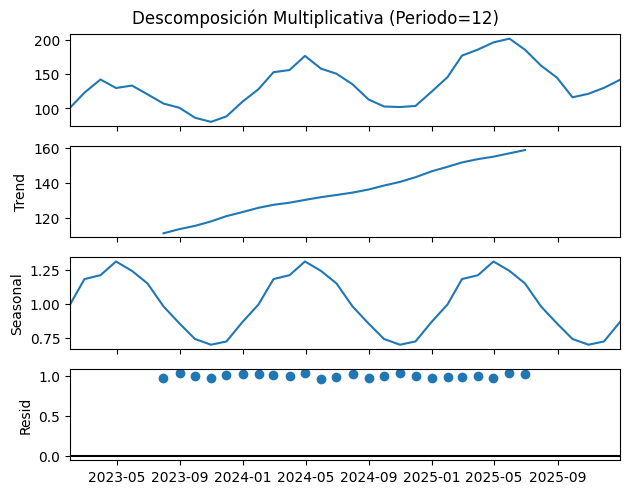

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- 1. DATOS DE EJEMPLO (Creando una serie con Tendencia y Estacionalidad) ---
fechas = pd.date_range('2023-01-01', periods=36, freq='M') # 3 años de datos mensuales
# Modelo Multiplicativo: Tendencia + Ciclo estacional (12 meses) * 1.5 * Factor de Ruido
valores = [100 + i * 2 + 30 * np.sin(2 * np.pi * i / 12) * (1 + i/50) + np.random.normal(0, 5) for i in range(len(fechas))]
serie_tiempo = pd.Series(valores, index=fechas)
# -----------------------------------------------------------------------------

# Realizar la descomposición. Usamos 'multiplicative' porque los picos crecen.
# period=12 porque la frecuencia de los datos es mensual y el ciclo es anual.
resultado = seasonal_decompose(serie_tiempo, model='multiplicative', period=12) 

# Graficar la Descomposición (mostrará el panel 'Seasonal')
resultado.plot()
plt.suptitle('Descomposición Multiplicativa (Periodo=12)', y=1.02)
plt.show()

# Obtener solo el componente de Estacionalidad (S_t)
componente_estacional = resultado.seasonal

## B. Gráfico de Autocorrelación (ACF)

El gráfico ACF mide la correlación de una serie consigo misma en diferentes desfases (lags). Un pico significativo y recurrente en el ACF a intervalos regulares ($s, 2s, 3s, \dots$) es una prueba estadística de estacionalidad.

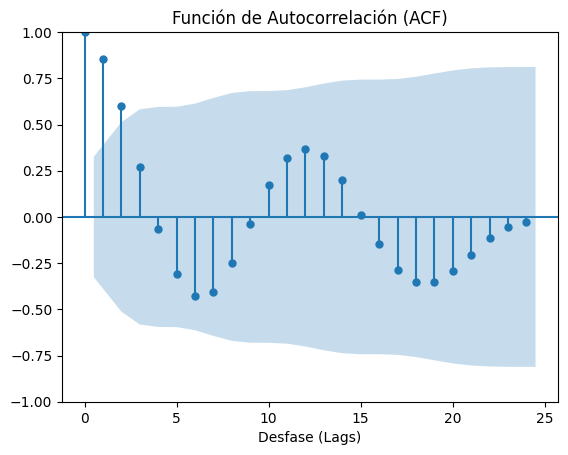

In [2]:
from statsmodels.graphics.tsaplots import plot_acf

# Graficar la función de autocorrelación
plot_acf(serie_tiempo, lags=24) # Miramos hasta 2 años
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Desfase (Lags)')
plt.show()

**Interpretación:** Si hay picos por encima de las líneas azules (intervalo de confianza) en los lags 12, 24, 36, etc., la estacionalidad es anual (periodo $s=12$).

# 4. Eliminación de la Estacionalidad (Desestacionalización) 🧹

Para aplicar modelos que no manejan la estacionalidad (como el ARIMA simple), debemos eliminarla. El proceso se llama Desestacionalización.

## A. Usando Diferenciación Estacional

Si la estacionalidad es aditiva, una diferencia de orden $s$ (donde $s$ es el período) suele eliminarla:

$$Z_t = Y_t - Y_{t-s}$$

Este método es fundamental para el modelo SARIMA (Seasonal ARIMA), que utiliza la diferenciación estacional ($D$).

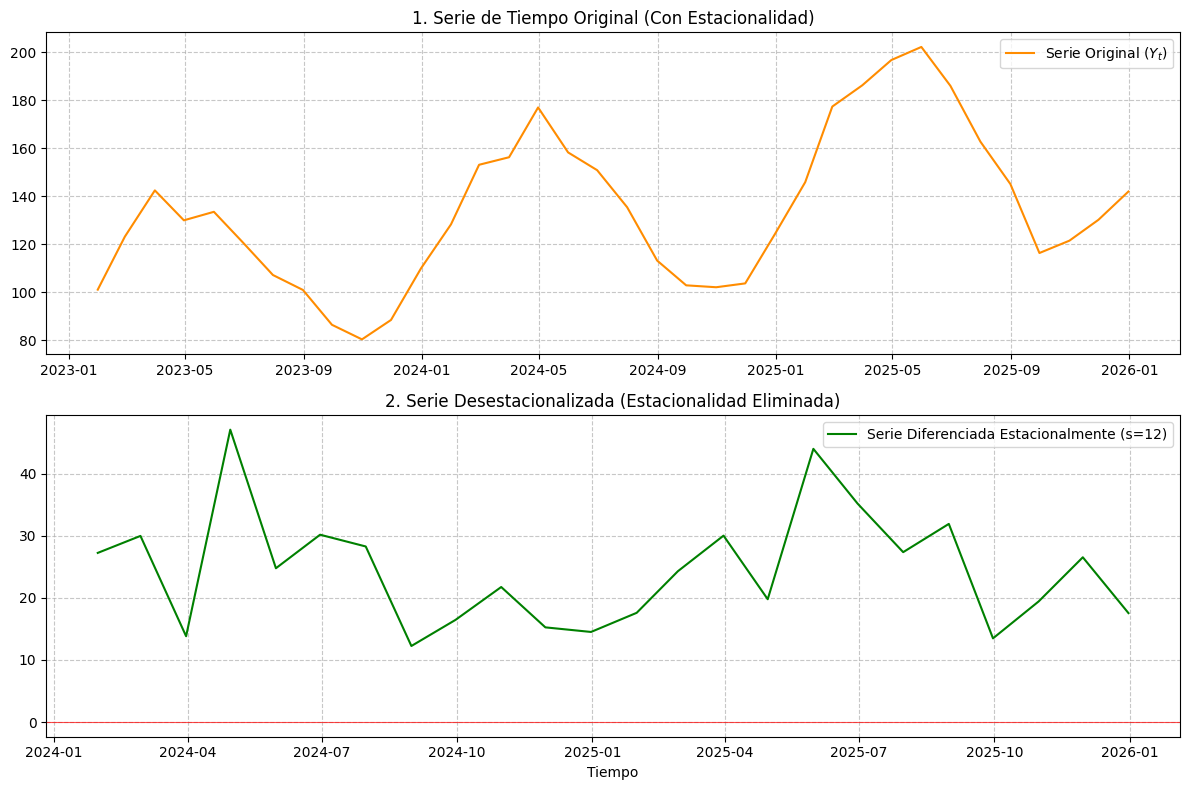

In [3]:
# Diferenciación Estacional (Periodo s=12)
s = 12
serie_desestacionalizada = serie_tiempo.diff(periods=s).dropna()

# --- COMPARACIÓN DE GRÁFICOS: ORIGINAL VS. DESESTACIONALIZADA ---

plt.figure(figsize=(12, 8))

# Subgráfico 1: Serie Original
plt.subplot(2, 1, 1)
plt.plot(serie_tiempo, label='Serie Original ($Y_t$)', color='darkorange')
plt.title('1. Serie de Tiempo Original (Con Estacionalidad)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Subgráfico 2: Serie Desestacionalizada
plt.subplot(2, 1, 2)
plt.plot(serie_desestacionalizada, label=f'Serie Diferenciada Estacionalmente (s={s})', color='green')
plt.axhline(0, color='red', linestyle='-', linewidth=0.8, alpha=0.7)
plt.title('2. Serie Desestacionalizada (Estacionalidad Eliminada)')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Nota para Científicos de Datos:** Al eliminar tanto la Tendencia (Diferencia de orden 1) como la Estacionalidad (Diferencia de orden $s$), la serie resultante se denomina Estacionaria, lo que permite la aplicación de modelos más sencillos y estables.